<a href="https://colab.research.google.com/github/MShaleni/FAKE-REVIEW-DETECTION/blob/main/model_code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Device: cuda
Dataset shape: (18211, 4)
             category  rating  label  \
0  Home_and_Kitchen_5     5.0      0   
1  Home_and_Kitchen_5     5.0      0   
2  Home_and_Kitchen_5     5.0      0   
3  Home_and_Kitchen_5     1.0      0   
4  Home_and_Kitchen_5     5.0      0   

                                               text_  
0  Love this!  Well made, sturdy, and very comfor...  
1  love it, a great upgrade from the original.  I...  
2  This pillow saved my back. I love the look and...  
3  Missing information on how to use it, but it i...  
4  Very nice set. Good quality. We have had the s...  

Sample cleaned review: love well made sturdy comfortable love itvery pretty


/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/25.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/481 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

Map:   0%|          | 0/14568 [00:00<?, ? examples/s]

Map:   0%|          | 0/3643 [00:00<?, ? examples/s]

model.safetensors:   0%|          | 0.00/499M [00:00<?, ?B/s]

Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at roberta-base and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.12/dist-packages/notebook/notebookapp.py:191: SyntaxWarning: invalid escape sequence '\/'
  | |_| | '_ \/ _` / _` |  _/ -_)


<IPython.core.display.Javascript object>

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize?ref=models
wandb: Paste an API key from your profile and hit enter:

 ··········


wandb: WARNING If you're specifying your api key in code, ensure this code is not shared publicly.
wandb: WARNING Consider setting the WANDB_API_KEY environment variable, or running `wandb login` from the command line.
wandb: No netrc file found, creating one.
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc
wandb: Currently logged in as: sandra-sebastian2024 (eshaan-rithesh2023-vit-chennai) to https://api.wandb.ai. Use `wandb login --relogin` to force relogin


Epoch,Training Loss,Validation Loss
1,0.328700,0.324911
2,0.203200,0.405655



✅ Fine-tuning complete. Model and tokenizer saved to ./roberta_finetuned


Device set to use cuda:0
/usr/local/lib/python3.12/dist-packages/transformers/pipelines/text_classification.py:111: UserWarning: `return_all_scores` is now deprecated,  if want a similar functionality use `top_k=None` instead of `return_all_scores=True` or `top_k=1` instead of `return_all_scores=False`.
  warnings.warn(
You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset



=== Evaluation on Sample Set ===
Accuracy: 0.844
Precision: 0.9361702127659575
Recall: 0.7272727272727273
F1: 0.8186046511627907


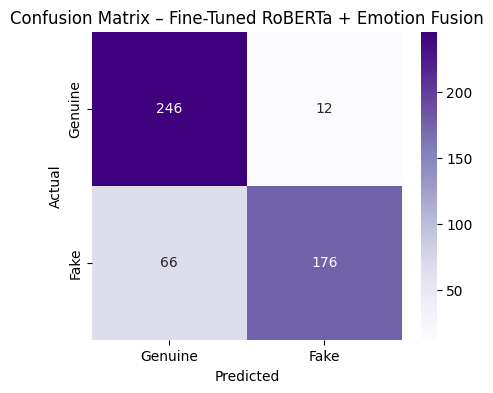


Running SHAP explainability ...


Device set to use cuda:0
/usr/local/lib/python3.12/dist-packages/transformers/pipelines/text_classification.py:111: UserWarning: `return_all_scores` is now deprecated,  if want a similar functionality use `top_k=None` instead of `return_all_scores=True` or `top_k=1` instead of `return_all_scores=False`.
  warnings.warn(
PartitionExplainer explainer: 11it [00:32,  5.45s/it]



✅ Exported results to 'fake_review_roberta_emotion_shap_results.csv'
             category  rating  label  \
0  Home_and_Kitchen_5     5.0      0   
1  Home_and_Kitchen_5     5.0      0   
2  Home_and_Kitchen_5     5.0      0   
3  Home_and_Kitchen_5     1.0      0   
4  Home_and_Kitchen_5     5.0      0   

                                               text_  \
0  Love this!  Well made, sturdy, and very comfor...   
1  love it, a great upgrade from the original.  I...   
2  This pillow saved my back. I love the look and...   
3  Missing information on how to use it, but it i...   
4  Very nice set. Good quality. We have had the s...   

                                        clean_review  Predicted_Label  \
0  love well made sturdy comfortable love itvery ...                0   
1   love great upgrade original ive mine couple year                0   
2            pillow saved back love look feel pillow                0   
3        missing information use great product price        

In [ ]:
# ============================================================
# FAKE REVIEW DETECTION: RoBERTa Fine-Tuned + Emotion Fusion + SHAP
# ============================================================

# 1️⃣ INSTALLATION
!pip install transformers shap nrclex datasets seaborn textblob torch torchvision torchaudio --quiet

# 2️⃣ IMPORTS
import pandas as pd, numpy as np, re, string, torch, shap, seaborn as sns, matplotlib.pyplot as plt
from nrclex import NRCLex
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.model_selection import train_test_split
from transformers import (
    AutoTokenizer, AutoModelForSequenceClassification,
    TrainingArguments, Trainer, pipeline
)
from datasets import Dataset
import nltk

# Download all NLTK resources as a comprehensive attempt
# nltk.download("all") # Commented out to avoid downloading all resources every time

# Download only necessary NLTK data
nltk.download('stopwords')
nltk.download('wordnet')

device = "cuda" if torch.cuda.is_available() else "cpu"
print("Device:", device)

# ------------------------------------------------------------
# 3️⃣ LOAD DATASET
# ------------------------------------------------------------
# Corrected file path assuming the file is in the current directory
df = pd.read_csv("/content/fake reviews dataset.csv")
df["label"] = df["label"].map({"CG":0,"OR":1}).fillna(df["label"]).astype(int)
print("Dataset shape:", df.shape)
print(df.head())

# ------------------------------------------------------------
# 4️⃣ TEXT CLEANING
# ------------------------------------------------------------
stop_words = set(stopwords.words("english"))
lemm = WordNetLemmatizer()

def clean_text(text):
    text = str(text).lower()
    text = re.sub(r"\d+", "", text)
    text = text.translate(str.maketrans("", "", string.punctuation))
    tokens = [lemm.lemmatize(w) for w in text.split() if w not in stop_words]
    return " ".join(tokens)

df["clean_review"] = df["text_"].apply(clean_text)
print("\nSample cleaned review:", df["clean_review"].iloc[0])

# ------------------------------------------------------------
# 5️⃣ EMOTION FEATURE EXTRACTION
# ------------------------------------------------------------
def emotion_vector(text):
    e = NRCLex(text)
    base = ["anger","fear","anticipation","trust","surprise","sadness","joy","disgust"]
    scores = e.raw_emotion_scores
    return [scores.get(b,0) for b in base]

emotion_vectors = np.array(df["clean_review"].apply(emotion_vector).tolist())
scaler = StandardScaler()
emotion_scaled = scaler.fit_transform(emotion_vectors)
emotion_df = pd.DataFrame(emotion_scaled, columns=["anger","fear","anticipation","trust","surprise","sadness","joy","disgust"])

# ------------------------------------------------------------
# 6️⃣ TRAIN / TEST SPLIT
# ------------------------------------------------------------
train_texts, test_texts, train_labels, test_labels = train_test_split(
    df["clean_review"].tolist(), df["label"].tolist(), test_size=0.2, random_state=42, stratify=df["label"]
)

# ------------------------------------------------------------
# 7️⃣ FINE-TUNE ROBERTA
# ------------------------------------------------------------
MODEL = "roberta-base"
tokenizer = AutoTokenizer.from_pretrained(MODEL)

def tokenize_fn(batch):
    return tokenizer(batch["text"], truncation=True, padding="max_length", max_length=256)

train_ds = Dataset.from_dict({"text": train_texts, "label": train_labels}).map(tokenize_fn, batched=True)
test_ds  = Dataset.from_dict({"text": test_texts,  "label": test_labels }).map(tokenize_fn, batched=True)
train_ds.set_format("torch")
test_ds.set_format("torch")

model = AutoModelForSequenceClassification.from_pretrained(MODEL, num_labels=2).to(device)

args = TrainingArguments(
    output_dir="./roberta_finetuned",
    eval_strategy="epoch",
    save_strategy="epoch",
    learning_rate=2e-5,
    per_device_train_batch_size=8,
    per_device_eval_batch_size=16,
    num_train_epochs=2,
    weight_decay=0.01,
    logging_steps=100,
    load_best_model_at_end=True,
    optim="adamw_torch",
)

trainer = Trainer(model=model, args=args, train_dataset=train_ds, eval_dataset=test_ds)
trainer.train()
trainer.save_model("./roberta_finetuned")
# Explicitly save the tokenizer
tokenizer.save_pretrained("./roberta_finetuned")
print("\n✅ Fine-tuning complete. Model and tokenizer saved to ./roberta_finetuned")

# ------------------------------------------------------------
# 8️⃣ LOAD FINE-TUNED MODEL PIPELINE
# ------------------------------------------------------------
fine_tuned_model_path = "./roberta_finetuned"
clf = pipeline(
    "text-classification",
    model=fine_tuned_model_path,
    tokenizer=fine_tuned_model_path,
    truncation=True,
    max_length=256,
    return_all_scores=True,
    device=0 if torch.cuda.is_available() else -1
)

# ------------------------------------------------------------
# 9️⃣ EMOTION-AWARE PREDICTIONS
# ------------------------------------------------------------
def predict_with_emotion(text, emo_vec):
    pred_list = clf(text)[0]  # Get the list of dictionaries for the first (and only) text
    # Ensure the label mapping is correct for the pipeline output
    # RoBERTa outputs 'LABEL_0' and 'LABEL_1' by default for binary classification
    p_fake = 0.0 # Default to 0.0 if 'LABEL_1' is not found
    for p in pred_list:
        if p['label'] == 'LABEL_1':
            p_fake = p['score']
            break # Found the score, exit the loop

    p_real = 1 - p_fake
    neg_em = np.mean([emo_vec[0], emo_vec[1], emo_vec[5], emo_vec[7]])  # anger,fear,sadness,disgust
    fused_fake = p_fake + 0.25 * neg_em
    fused_real = p_real - 0.25 * neg_em
    return 1 if fused_fake > fused_real else 0, p_fake, fused_fake

sample_size = 500  # test subset for speed
texts = df["clean_review"][:sample_size].tolist()
y_true = df["label"][:sample_size].tolist()

preds, base_conf, fused_conf = [], [], []
for i, text in enumerate(texts):
    label, base, fused = predict_with_emotion(text, emotion_scaled[i])
    preds.append(label)
    base_conf.append(base)
    fused_conf.append(fused)

# ------------------------------------------------------------
# 🔟 EVALUATION
# ------------------------------------------------------------
print("\n=== Evaluation on Sample Set ===")
print("Accuracy:", accuracy_score(y_true, preds))
print("Precision:", precision_score(y_true, preds))
print("Recall:", recall_score(y_true, preds))
print("F1:", f1_score(y_true, preds))

cm = confusion_matrix(y_true, preds)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Purples",
            xticklabels=["Genuine","Fake"], yticklabels=["Genuine","Fake"])
plt.title("Confusion Matrix – Fine-Tuned RoBERTa + Emotion Fusion")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# ------------------------------------------------------------
# 11️⃣ SHAP EXPLAINABILITY
# ------------------------------------------------------------
print("\nRunning SHAP explainability ...")
sample_texts = df["clean_review"].sample(10, random_state=42).tolist() # Changed sample size to 10
explainer_pipeline = pipeline(
    "text-classification",
    model=fine_tuned_model_path,
    tokenizer=fine_tuned_model_path,
    truncation=True,
    max_length=256,
    return_all_scores=True,
    device=0 if torch.cuda.is_available() else -1
)

explainer = shap.Explainer(explainer_pipeline)
shap_values = explainer(sample_texts)

# Single example explanation
shap.plots.text(shap_values[0])
# Summary of top tokens across examples
# shap.summary_plot(shap_values) # Commented out as it caused errors previously

# ------------------------------------------------------------
# 12️⃣ EXPORT RESULTS FOR POWER BI
# ------------------------------------------------------------
export_df = pd.concat([df.iloc[:sample_size].reset_index(drop=True),
                       pd.DataFrame({
                           "Predicted_Label": preds,
                           "Base_Confidence": base_conf,
                           "Fused_Confidence": fused_conf
                       }),
                       emotion_df.iloc[:sample_size].reset_index(drop=True)
                      ], axis=1)

export_df.to_csv("fake_review_roberta_emotion_shap_results.csv", index=False)
print("\n✅ Exported results to 'fake_review_roberta_emotion_shap_results.csv'")
print(export_df.head())

In [ ]:
from transformers import pipeline
clf = pipeline("text-classification", model="./roberta_finetuned", tokenizer="./roberta_finetuned")


Device set to use cuda:0


In [ ]:
# ------------------------------------------------------------
# DISPLAY TEXT + PREDICTION + EMOTIONS
# ------------------------------------------------------------
import pandas as pd
from IPython.display import display

# Map numeric labels to readable ones
export_df["Predicted_Label_Name"] = export_df["Predicted_Label"].map({0: "Original", 1: "Fake"})

# Round emotion values for readability
emotion_cols = ["anger","fear","anticipation","trust","surprise","sadness","joy","disgust"]
export_df[emotion_cols] = export_df[emotion_cols].round(3)

# Select columns to show
cols_to_show = ["text_", "Predicted_Label_Name", "Base_Confidence", "Fused_Confidence"] + emotion_cols

# Display first 10 reviews neatly
display(export_df[cols_to_show].head(10))


,text_,Predicted_Label_Name,Base_Confidence,Fused_Confidence,anger,fear,anticipation,trust,surprise,sadness,joy,disgust
0,"Love this! Well made, sturdy, and very comfor...",Original,0.002163,-0.108277,-0.405,-0.501,-0.268,-0.346,-0.467,-0.524,0.417,-0.336
1,"love it, a great upgrade from the original. I...",Original,0.002647,-0.107793,-0.405,-0.501,-0.628,-0.668,-0.467,-0.524,-0.274,-0.336
2,This pillow saved my back. I love the look and...,Original,0.002977,-0.107463,-0.405,-0.501,-0.628,-0.668,-0.467,-0.524,-0.274,-0.336
3,"Missing information on how to use it, but it i...",Original,0.457539,0.427059,-0.405,0.103,-0.628,-0.668,-0.467,0.151,-0.619,-0.336
4,Very nice set. Good quality. We have had the s...,Original,0.005264,-0.105176,-0.405,-0.501,-0.268,-0.346,0.054,-0.524,-0.274,-0.336
5,I WANTED DIFFERENT FLAVORS BUT THEY ARE NOT.,Fake,0.709672,0.599232,-0.405,-0.501,-0.628,-0.668,-0.467,-0.524,-0.619,-0.336
6,They are the perfect touch for me and the only...,Original,0.010075,-0.100365,-0.405,-0.501,-0.268,-0.346,-0.467,-0.524,-0.274,-0.336
7,These done fit well and look great. I love th...,Original,0.006139,-0.104301,-0.405,-0.501,-0.628,-0.668,-0.467,-0.524,-0.274,-0.336
8,"Great big numbers & easy to read, the only thi...",Original,0.004242,-0.106198,-0.405,-0.501,-0.628,-0.668,-0.467,-0.524,-0.619,-0.336
9,My son loves this comforter and it is very wel...,Original,0.006480,-0.103960,-0.405,-0.501,-0.628,-0.668,-0.467,-0.524,0.072,-0.336


In [ ]:
# ------------------------------------------------------------
# DISPLAY TEXT + PREDICTION + MAJOR EMOTION
# ------------------------------------------------------------
import numpy as np
from IPython.display import display

# Emotion columns
emotion_cols = ["anger","fear","anticipation","trust","surprise","sadness","joy","disgust"]

# Find dominant emotion for each review
export_df["Major_Emotion"] = export_df[emotion_cols].idxmax(axis=1)

# Map numeric labels to human-readable
export_df["Predicted_Label_Name"] = export_df["Predicted_Label"].map({0: "Original", 1: "Fake"})

# Round confidence for neat display
export_df["Fused_Confidence"] = export_df["Fused_Confidence"].round(3)

# Select only relevant columns
cols = ["text_", "Predicted_Label_Name", "Fused_Confidence", "Major_Emotion"]

# Display first few results neatly
print("🔍 Sample Predictions with Major Emotion:\n")
display(export_df[cols].head(10))


🔍 Sample Predictions with Major Emotion:



,text_,Predicted_Label_Name,Fused_Confidence,Major_Emotion
0,"Love this! Well made, sturdy, and very comfor...",Original,-0.108,joy
1,"love it, a great upgrade from the original. I...",Original,-0.108,joy
2,This pillow saved my back. I love the look and...,Original,-0.107,joy
3,"Missing information on how to use it, but it i...",Original,0.427,sadness
4,Very nice set. Good quality. We have had the s...,Original,-0.105,surprise
5,I WANTED DIFFERENT FLAVORS BUT THEY ARE NOT.,Fake,0.599,disgust
6,They are the perfect touch for me and the only...,Original,-0.100,anticipation
7,These done fit well and look great. I love th...,Original,-0.104,joy
8,"Great big numbers & easy to read, the only thi...",Original,-0.106,disgust
9,My son loves this comforter and it is very wel...,Original,-0.104,joy


In [ ]:
emotion_emoji = {
    "anger":"😡", "fear":"😨", "anticipation":"🤔", "trust":"🤝",
    "surprise":"😲", "sadness":"😢", "joy":"😊", "disgust":"🤢"
}
export_df["Emotion_Display"] = export_df["Major_Emotion"].map(emotion_emoji)

display(export_df[["text_","Predicted_Label_Name","Fused_Confidence","Emotion_Display"]].head(10))


,text_,Predicted_Label_Name,Fused_Confidence,Emotion_Display
0,"Love this! Well made, sturdy, and very comfor...",Original,-0.108,😊
1,"love it, a great upgrade from the original. I...",Original,-0.108,😊
2,This pillow saved my back. I love the look and...,Original,-0.107,😊
3,"Missing information on how to use it, but it i...",Original,0.427,😢
4,Very nice set. Good quality. We have had the s...,Original,-0.105,😲
5,I WANTED DIFFERENT FLAVORS BUT THEY ARE NOT.,Fake,0.599,🤢
6,They are the perfect touch for me and the only...,Original,-0.100,🤔
7,These done fit well and look great. I love th...,Original,-0.104,😊
8,"Great big numbers & easy to read, the only thi...",Original,-0.106,🤢
9,My son loves this comforter and it is very wel...,Original,-0.104,😊


In [ ]:
import plotly.express as px

fig = px.scatter(
    export_df.head(200),  # sample
    x="joy", y="anger",
    color="Predicted_Label_Name",
    hover_data=["text_","Base_Confidence","fear","sadness"]
)
fig.update_layout(title="Emotion Space of Reviews")
fig.show()


In [ ]:
# Pretty print a few example rows nicely formatted
for i, row in export_df.head(10).iterrows():
    print(f"📝 Review: {row['text_'][:150]}...")
    print(f"🔹 Predicted: {row['Predicted_Label_Name']} ({row['Fused_Confidence']:.3f})")
    print(f"💬 Emotion: {row['Major_Emotion'].capitalize()}")
    print("-" * 80)


📝 Review: Love this!  Well made, sturdy, and very comfortable.  I love it!Very pretty...
🔹 Predicted: Original (-0.108)
💬 Emotion: Joy
--------------------------------------------------------------------------------
📝 Review: love it, a great upgrade from the original.  I've had mine for a couple of years...
🔹 Predicted: Original (-0.108)
💬 Emotion: Joy
--------------------------------------------------------------------------------
📝 Review: This pillow saved my back. I love the look and feel of this pillow....
🔹 Predicted: Original (-0.107)
💬 Emotion: Joy
--------------------------------------------------------------------------------
📝 Review: Missing information on how to use it, but it is a great product for the price!  I...
🔹 Predicted: Original (0.427)
💬 Emotion: Sadness
--------------------------------------------------------------------------------
📝 Review: Very nice set. Good quality. We have had the set for two months now and have not been...
🔹 Predicted: Original (-0.105)


In [ ]:
# -------------------------------
# 📦 Final Export for Power BI / CSV
# -------------------------------

import pandas as pd

# Map emoji to main emotions
emotion_emoji = {
    "anger": "😡",
    "fear": "😨",
    "anticipation": "🤔",
    "trust": "🤝",
    "surprise": "😲",
    "sadness": "😢",
    "joy": "😊",
    "disgust": "🤢"
}

# Add emoji column
export_df["Emotion_Emoji"] = export_df["Major_Emotion"].map(emotion_emoji)

# Rename columns cleanly for Power BI / CSV
final_export = export_df.rename(columns={
    "text_": "Review_Text",
    "Predicted_Label_Name": "Predicted_Label",
    "Fused_Confidence": "Confidence_Score",
    "Major_Emotion": "Dominant_Emotion"
})[["Review_Text", "Predicted_Label", "Confidence_Score", "Dominant_Emotion", "Emotion_Emoji"]]

# Save to CSV
final_csv_path = "/content/fake_review_roberta_emotion_summary.csv"
final_export.to_csv(final_csv_path, index=False, encoding="utf-8-sig")

print(f"✅ Exported final summary CSV to: {final_csv_path}")
print(final_export.head(10))


✅ Exported final summary CSV to: /content/fake_review_roberta_emotion_summary.csv
                                         Review_Text Predicted_Label  \
0  Love this!  Well made, sturdy, and very comfor...               0   
1  love it, a great upgrade from the original.  I...               0   
2  This pillow saved my back. I love the look and...               0   
3  Missing information on how to use it, but it i...               0   
4  Very nice set. Good quality. We have had the s...               0   
5       I WANTED DIFFERENT FLAVORS BUT THEY ARE NOT.               1   
6  They are the perfect touch for me and the only...               0   
7  These done fit well and look great.  I love th...               0   
8  Great big numbers & easy to read, the only thi...               0   
9  My son loves this comforter and it is very wel...               0   

  Predicted_Label  Confidence_Score Dominant_Emotion Emotion_Emoji  
0        Original            -0.108              joy    

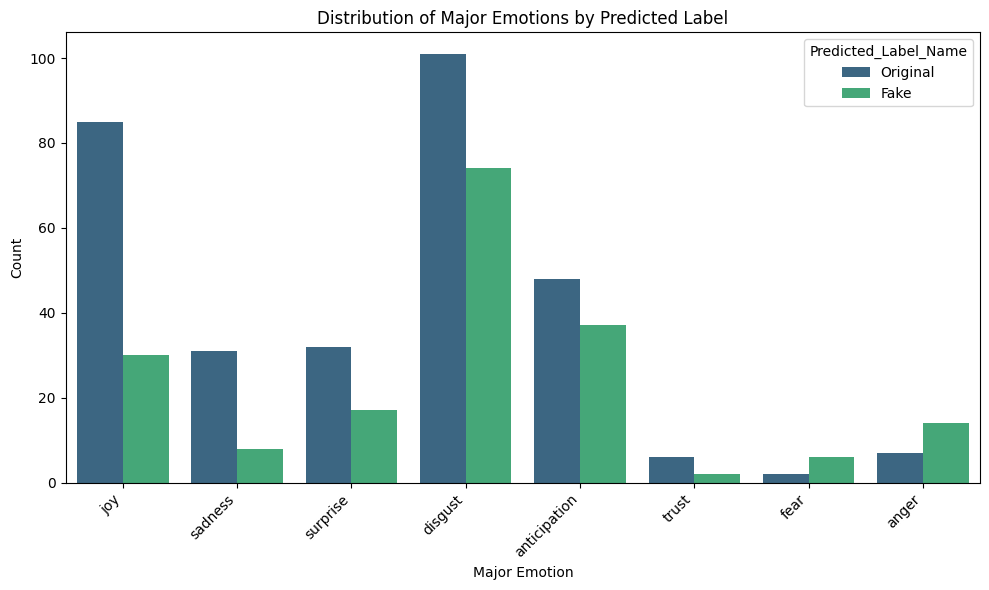

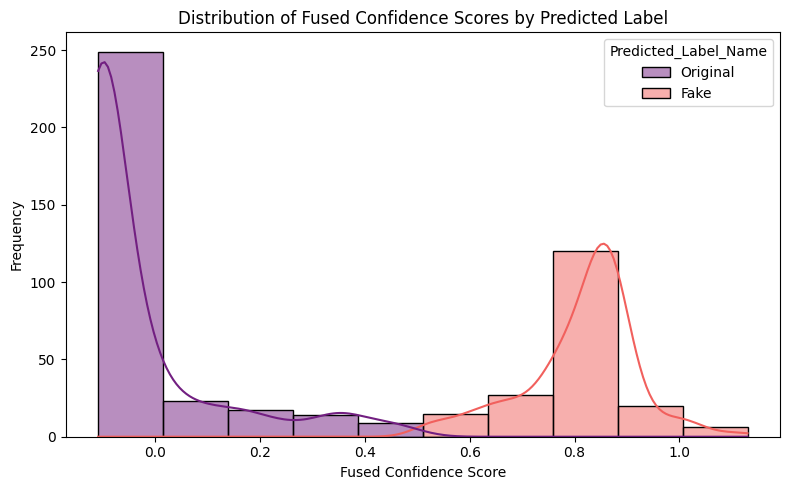

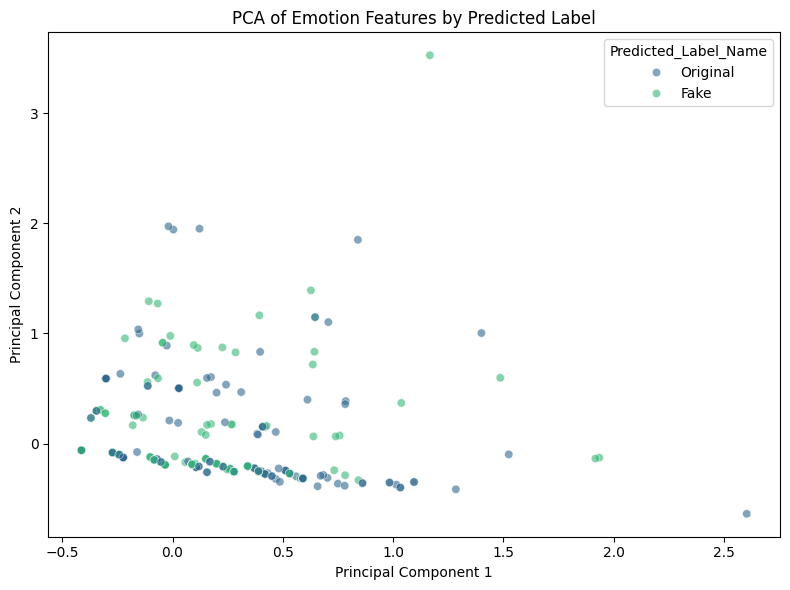

/tmp/ipython-input-2585749098.py:48: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




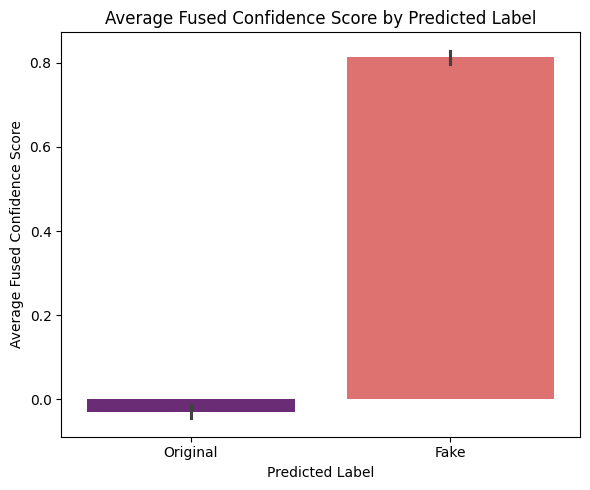

In [ ]:
# ------------------------------------------------------------
# 📊 VISUALIZATIONS
# ------------------------------------------------------------

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Bar plot of Major Emotions by Predicted Label
plt.figure(figsize=(10, 6))
sns.countplot(data=export_df, x="Major_Emotion", hue="Predicted_Label_Name", palette="viridis")
plt.title("Distribution of Major Emotions by Predicted Label")
plt.xlabel("Major Emotion")
plt.ylabel("Count")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

# Histogram of Fused Confidence Scores
plt.figure(figsize=(8, 5))
sns.histplot(data=export_df, x="Fused_Confidence", hue="Predicted_Label_Name", kde=True, palette="magma")
plt.title("Distribution of Fused Confidence Scores by Predicted Label")
plt.xlabel("Fused Confidence Score")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

# Scatter plot of Emotion PCA (first 2 components)
# Ensure emotion_df is accessible and has more than 2 columns for PCA
if 'emotion_df' in globals() and emotion_df.shape[1] >= 2 and len(export_df) > 1:
    pca = PCA(n_components=2)
    emotion_pca = pca.fit_transform(export_df[emotion_cols])
    emotion_pca_df = pd.DataFrame(emotion_pca, columns=["PC1", "PC2"])
    emotion_pca_df["Predicted_Label_Name"] = export_df["Predicted_Label_Name"]

    plt.figure(figsize=(8, 6))
    sns.scatterplot(data=emotion_pca_df, x="PC1", y="PC2", hue="Predicted_Label_Name", palette="viridis", alpha=0.6)
    plt.title("PCA of Emotion Features by Predicted Label")
    plt.xlabel("Principal Component 1")
    plt.ylabel("Principal Component 2")
    plt.tight_layout()
    plt.show()
else:
    print("Skipping PCA plot: emotion_df not available, has less than 2 columns, or export_df is too small.")

# Bar plot of Average Fused Confidence Score by Predicted Label
plt.figure(figsize=(6, 5))
sns.barplot(data=export_df, x="Predicted_Label_Name", y="Fused_Confidence", palette="magma", errorbar='ci')
plt.title("Average Fused Confidence Score by Predicted Label")
plt.xlabel("Predicted Label")
plt.ylabel("Average Fused Confidence Score")
plt.tight_layout()
plt.show()